# RAPORT 1
### Jakub Franczak(262271), Marcelina Białek(268871)

### Spis treści
1. [Zaimportowanie bibliotek](#1)
2. [Zadanie 1](#2)
3. [Zadanie 2](#3)
4. [Zadanie 3](#4)
5. [Zadanie 4](#5)
6. [Zadanie 5](#6)

##  1. Zaimportowanie bibliotek <a name="1"></a>

In [8]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import timeit
import scipy.stats as st
from memory_profiler import memory_usage
from scipy.stats import shapiro, norm, kstest, chisquare,poisson,ks_2samp, anderson, skew, kurtosis
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.special import erfinv



## 2. Zadanie 1 <a name="2"></a>

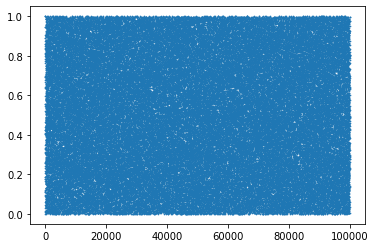

In [9]:
#parametry
m_1=2**32 -209
m_2=2**32-22853
amount=100000 # ilość wygenerowanych liczb pseudolosowych

#listy do przechowywania wartości (za 3 pierwsze wartości X i Y przyjmujemy 1)
U=np.ones(amount)
X=np.ones(amount)
Y=np.ones(amount)

#generowanie liczb pseudolosowych z warunkami rekurencyjnymi
for i in range(amount-3):
    X[i+3]=(1403580 * X[i+1] - 810728 * X[i]) % m_1
    Y[i+3]=(527612 * Y[i+2] - 1370589 * Y[i]) % m_2

    if X[i+3]<=Y[i+3]:
        U[i+3]=(X[i+3]-Y[i+3]+m_1)/(m_1+1)
    else:
        U[i+3]=(X[i+3]-Y[i+3])/(m_1+1)

#wizualizacja wyników
x = np.array([i for i in range(amount)])
plt.scatter(x,U,s=0.5)
plt.show()

Jak możemy zauważyć na powyższej ilustracji, wygenerowane liczby wiernie nasladują zmienne losowe z rozkładu jednostajnego U(0,1). Można to stwierdzić po tym, że przypominają szum losowy. Dzięki temu możemy stwierdzić, że metoda przedstawiona w poleceniu faktycznie generuje liczby pseudolosowe.

## 3. Zadanie 2 <a name="3"></a>
### Generowanie rozkładu

In [10]:

p=0.5 #wybrany parametr p dla rozkładu geometrycznego
geom_wart = np.array([1, 2, 3, 4, 5])  # możliwe wartości dla rozkładu geometrycznego

prawdopodobienstwo = np.zeros_like(geom_wart, dtype=float) #tablica zer

for i, k in enumerate(geom_wart): #zamiana zer ze wzoru P(X=k)=(1 - p) ** (k - 1) * p
    prawdopodobienstwo[i] = (1 - p) ** (k - 1) * p 

lambda_poisson = 2  # Parametr lambda dla rozkładu Poissona
amount = 100000 #liczba prób 
poisson_teoretyczny=np.random.poisson(lambda_poisson, amount)
wyniki = np.zeros(amount)
i = 0
while i < amount:
    u = np.random.uniform(size=1)
    x = np.random.choice(geom_wart)
    c = np.max(prawdopodobienstwo)

    #Warunek if
    if u <= prawdopodobienstwo[x - 1] / c:
        wyniki[i] = np.random.poisson(x)  # generowanie rozkładu Poissona
        i = i + 1

### GENEROWANIE WYKRESÓW

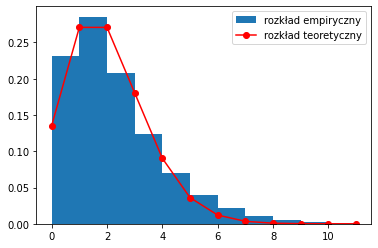

In [11]:
plt.hist(wyniki, bins=np.arange(0, 12, 1), density=True, label="rozkład empiryczny")
plt.plot(np.arange(0, 12), [((np.exp(-lambda_poisson) * (lambda_poisson ** k)) / np.math.factorial(k)) for k in np.arange(0, 12)],
         'ro-', label="rozkład teoretyczny") 
plt.legend()
plt.show()

Do wykresu rozkładu teoretycznego wykorzystano wzór:\
$p=\frac{e^{-\lambda}\lambda^k}{k!}$,\
który jest wzorem na prawdopodobieństwo wystąpienia dokładnie k zdarzeń dla rozkładu Poissona
#### Rysowanie wykresów empirycznych oraz teoretycznych histogramu i dystrybuanty wygenerowanego rozkładu

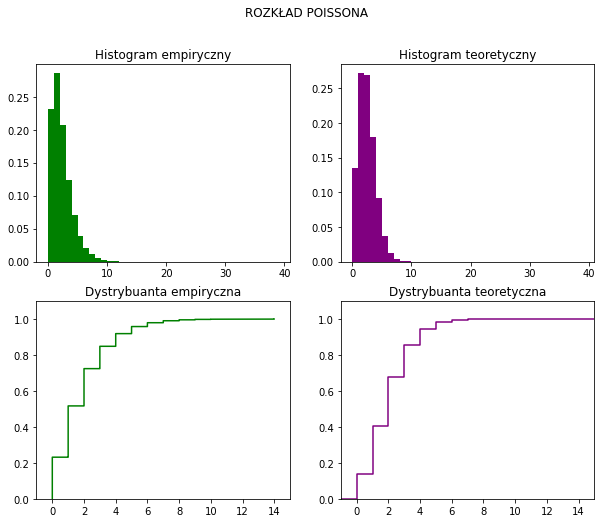

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Wykres 1 - histogram wygenerowanego przez nas rozkładu
axs[0, 0].hist(wyniki, bins=np.arange(0, 40, 1), density=True, color='green')
axs[0, 0].set_title('Histogram empiryczny')


# Wykres 2 - histogram teoretyczny
axs[0, 1].hist(poisson_teoretyczny, bins=np.arange(0, 40, 1), density=True, color='purple')
axs[0, 1].set_title('Histogram teoretyczny')


# Wykres 3 - dystrybuanta empiryczna

#obliczenie
ecdf = ECDF(wyniki)
# narysowanie wykresu
axs[1, 0].step(ecdf.x, ecdf.y, color='green')
axs[1, 0].set_xlim(-1, 15, 1)
axs[1, 0].set_ylim(0, 1.1, 0.1)
axs[1, 0].set_title('Dystrybuanta empiryczna')


# Wykres 4 - dystrybuanta teoretyczna

wartosci_k = list(range(-1, 21)) # lista z wartościami k
poisson_cdf = poisson.cdf(wartosci_k, mu=lambda_poisson)
# narysowanie wykresu 
axs[1, 1].step(wartosci_k, poisson_cdf, color='purple', where='post')
axs[1, 1].set_xlim(-1, 15, 1)
axs[1, 1].set_ylim(0, 1.1, 0.1)
axs[1, 1].set_title('Dystrybuanta teoretyczna')
fig.suptitle("ROZKŁAD POISSONA")
plt.show()


### PRZEPROWADZENIE TESTÓW STATYSTYCZNYCH
#### Test statystyczny Kołmogowa-Smirnowa:

In [13]:
ks_stat, p_value = ks_2samp(wyniki, geom_wart)
print("TEST STATYSTYCZNY KOŁMOGOROWA-SMIRNOWA:")
print("Wartość statystyki:", ks_stat)
print("Wartość p:", p_value)

TEST STATYSTYCZNY KOŁMOGOROWA-SMIRNOWA:
Wartość statystyki: 0.32433
Wartość p: 0.5679518193720848


## 4. Zadanie 3 <a name="4"></a>

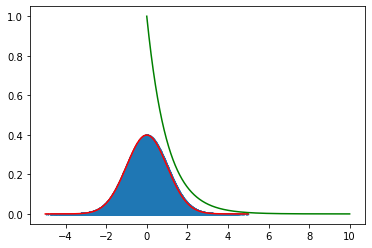

In [14]:
#parametry
amount=1000000
lambada=1
sigma= 0
ro= 1
delta=0.1
podzial=100

#próbki z rozkładu jednostajnego U(0,1) i U(0,5*ro)
uniform_1=np.random.uniform(0,5*ro,size=amount)
uniform_2=np.random.uniform(0,1,size=amount)

#listy do przechowywania próbek zaakceptowanych
y=[]
x=[]

#zmienna do liczenia ilosci obliczen funkcji wykladniczej
ile_wykladniczych=0

#lista do przechowywania wartości skrajnych na przedziałach
przedzialy =[]

for i in range(podzial):
   przedzialy.append(st.norm.pdf(i*delta))

for i in range(amount-1):
    index=0
    # szukanie odpowiedniego przedziału
    while True:
        if index*delta<uniform_1[i]<=(index+1)*delta:
            break
        else:
            index+=1
    exxp =lambada*np.exp(-lambada*uniform_1[i])
    if exxp*uniform_2[i]<=przedzialy[index+1]:
        u=np.random.random()
        if u<0.5:
            y.append(exxp*uniform_2[i])
            x.append(uniform_1[i])
        else:
            y.append(exxp*uniform_2[i])
            x.append(-uniform_1[i])
    elif przedzialy[index+1]<=exxp*uniform_2[i]<=przedzialy[index]:
        if exxp*uniform_2[i]<=1/(ro*np.sqrt(2*np.pi))*np.exp(-(uniform_1[i]-sigma)**2/(2*ro**2)):
            u=np.random.random()
            ile_wykladniczych+=1
            if u<0.5:
                y.append(exxp*uniform_2[i])
                x.append(uniform_1[i])
            else:
                y.append(exxp*uniform_2[i])
                x.append(-uniform_1[i])
plt.scatter(x,y,s=0.5)
   


xx = np.arange(-5*ro, 5*ro, 0.001)  #gestosc teoretyczna rozkladu normalnego 
cc = st.norm.pdf (xx, loc=sigma, scale = ro)
plt.plot(xx,cc, c="r")

xxx = np.arange(0, 10, 0.001)   #gestosc teoretyczna rozkladu wykladniczego
ccc = st.expon.pdf (xxx, loc=0, scale = 1/lambada)
plt.plot(xxx,ccc,c="g")

plt.show()

## 4.1 Zadanie 3.1 <a name="4.1"></a>

Text(0, 0.5, 'Ilość liczonych funkcji wykładniczych')

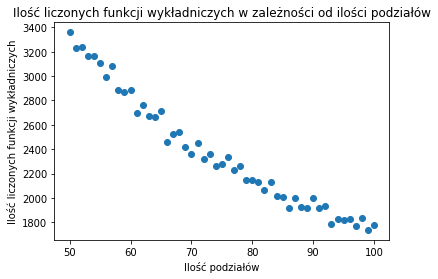

In [15]:
#parametry
lambada=1
sigma= 0
ro= 1


def wyk(podzial, delta, amount):
    przedzialy =[]
    for i in range(podzial):
        przedzialy.append(st.norm.pdf(i*delta))
    
    #zmienna do liczenia ilosci obliczen funkcji wykladniczej
    ile_wykladniczych=0

    #próbki z rozkładu jednostajnego U(0,1) i U(0,5*ro)
    uniform_1=np.random.uniform(0,5*ro,size=amount)
    uniform_2=np.random.uniform(0,1,size=amount)


    for i in range(amount-1):
        index=0
        # szukanie odpowiedniego przedziału
        while True:
            if index*delta<uniform_1[i]<=(index+1)*delta:
                break
            else:
                index+=1
        exxp =lambada*np.exp(-lambada*uniform_1[i])
        if przedzialy[index+1]<=exxp*uniform_2[i]<=przedzialy[index]:
            if exxp*uniform_2[i]<=1/(ro*np.sqrt(2*np.pi))*np.exp(-(uniform_1[i]-sigma)**2/(2*ro**2)):
                ile_wykladniczych+=1
    return ile_wykladniczych
amount=100000
y=[]
x=[]
for i in range(50,101):
    podzial=i
    delta=10/podzial
    x.append(i)
    y.append(wyk(podzial,delta,amount))
plt.scatter(x,y)
plt.title('Ilość liczonych funkcji wykładniczych w zależności od ilości podziałów')
plt.xlabel("Ilość podziałów")
plt.ylabel('Ilość liczonych funkcji wykładniczych')


## 5. Zadanie 4 <a name="5"></a>

In [16]:
mu = 2 #parametr mu generowanego przez nas rozkładu normalnego
sigma = 3 #parametr sigma generowanego przez nas rozkładu normalnego
n=10**5 #liczba prób

#Funkcja wbudowana dla n prób
def wbudowana():
    return np.random.normal(mu, sigma, n)
norm_wbud=wbudowana()
wbud_czas=timeit.timeit(wbudowana, number=1)
wbud_uzycie_pamieci = memory_usage(proc=wbudowana)



#Metoda odwróconej dystrybuanty dla n prób
from scipy.special import erfinv 
# funkcja erfinv(x) zwraca takie y, że erf(y) = x, gdzie erf(y) jest dystrybuantą standardowego rozkładu normalnego
def odwrotna_dystrybuanta(mu, sigma, n):
    u = np.random.uniform(size=n)
    z = mu + sigma * math.sqrt(2) * erfinv(2 * u - 1)
    return z
norm_odwr=odwrotna_dystrybuanta(mu, sigma, n)
odwrotna_dystrybuanta_czas = timeit.timeit(lambda: odwrotna_dystrybuanta(mu, sigma, n), number=1)
odwrotna_dystrybuanta_uzycie_pamieci = memory_usage(proc=lambda: odwrotna_dystrybuanta(mu, sigma, n))




#Metoda akceptacji-odrzucenia
def akceptacja_odrzucenie(mu, sigma, n):
    C = 2 / np.sqrt(2 * np.pi) * sigma
    X = np.zeros(n)
    i = 0
    while i < n:
        Y = np.random.normal(loc=mu, scale=sigma)
        U = np.random.uniform(0, C * np.exp(-(Y - mu)**2 / (2 * sigma**2)))
        if U <= np.exp(-(Y - mu)**2 / (2 * sigma**2)):
            X[i] = Y
            i = i + 1
    return X
akceptacja_odrzucenie_czas = timeit.timeit(lambda: akceptacja_odrzucenie(mu, sigma, n), number=1)
akceptacja_odrzucenie_uzycie_pamieci = memory_usage(proc=lambda: akceptacja_odrzucenie(mu, sigma, n))
norm_akcept=akceptacja_odrzucenie(mu, sigma, n)




#Metoda Boxa-Mullera
def box_muller(mu, sigma, n):
    # lista na wygenerowane próby
    proby = []

    # generowanie prób
    while len(proby) < n:
        u1 = np.random.uniform() #rozkład jednostajny na przedziale (0,1)
        u2 = np.random.uniform()

        # przekształcenie prób z rozkładu jednostajnego na próby z rozkładu normalnego
        z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
        z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)

        # obliczenie wartości próby z rozkładu normalnego
        x = mu + sigma * z1
        proby.append(x)

        # sprawdzenie, czy należy dodać drugą próbę
        if len(proby) < n:
            x = mu + sigma * z2
            proby.append(x)

    return np.array(proby)
norm_box=box_muller(mu, sigma, n)
box_muller_czas = timeit.timeit(lambda: box_muller(mu, sigma, n), number=1)
box_muller_uzycie_pamieci = memory_usage(proc=lambda: box_muller(mu, sigma, n))

## Generowanie wykresów
### Histogramy

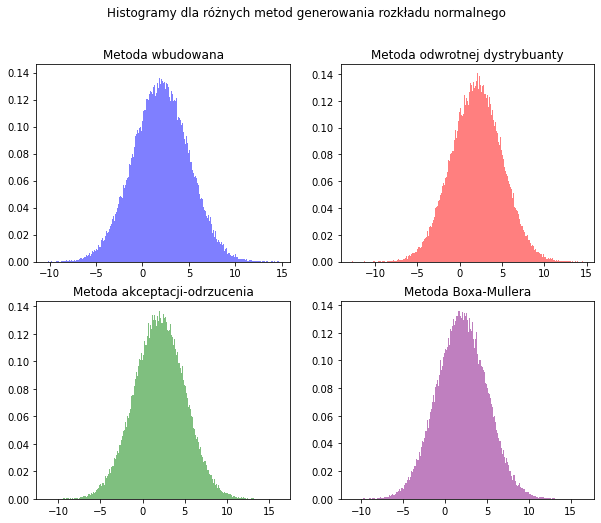

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Histogramy dla różnych metod generowania rozkładu normalnego')
axs[0, 0].hist(norm_wbud,color='blue', alpha=0.5, density=True, bins='sqrt')
axs[0, 0].set_title('Metoda wbudowana')
axs[0, 1].hist(norm_odwr,color='red', alpha=0.5, density=True, bins='sqrt')
axs[0, 1].set_title('Metoda odwrotnej dystrybuanty')
axs[1, 0].hist(norm_akcept, color='green', alpha=0.5, density=True, bins='sqrt')
axs[1, 0].set_title('Metoda akceptacji-odrzucenia')
axs[1, 1].hist(norm_box, color='purple', alpha=0.5, density=True, bins='sqrt')
axs[1, 1].set_title('Metoda Boxa-Mullera')
plt.show()

### Dystrybuanty

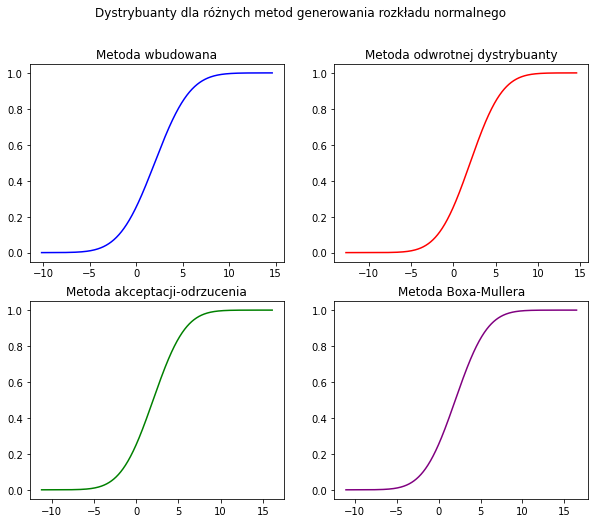

In [18]:

# WYZNACZENIE PRZEDZIAŁÓW DLA OSI X
x_wbud=np.linspace(norm_wbud.min(), norm_wbud.max(), 1000)
x_odwr = np.linspace(norm_odwr.min(), norm_odwr.max(), 1000)
x_akcept=np.linspace(norm_akcept.min(), norm_akcept.max(), 1000)
x_box=np.linspace(norm_box.min(), norm_box.max(), 1000)
# WYZNACZENIE DYSTRYBUANTY DLA PRZEDZIAŁÓW X
cdf_wbud = norm.cdf(x_wbud, loc=mu, scale=sigma) #wbudowana funkcja do dystrybuant
cdf_odwr = norm.cdf(x_odwr, loc=mu, scale=sigma)
cdf_akcept = norm.cdf(x_akcept, loc=mu, scale=sigma)
cdf_box = norm.cdf(x_box, loc=mu, scale=sigma)
#RYSOWANIE WYKRESÓW
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Dystrybuanty dla różnych metod generowania rozkładu normalnego')
axs[0, 0].plot(x_wbud, cdf_wbud, color='blue')
axs[0, 0].set_title('Metoda wbudowana')
axs[0, 1].plot(x_odwr, cdf_odwr, color='red')
axs[0, 1].set_title('Metoda odwrotnej dystrybuanty')
axs[1, 0].plot(x_akcept, cdf_akcept, color='green')
axs[1, 0].set_title('Metoda akceptacji-odrzucenia')
axs[1, 1].plot(x_box, cdf_box, color='purple')
axs[1, 1].set_title('Metoda Boxa-Mullera')
plt.show()

### Gęstości

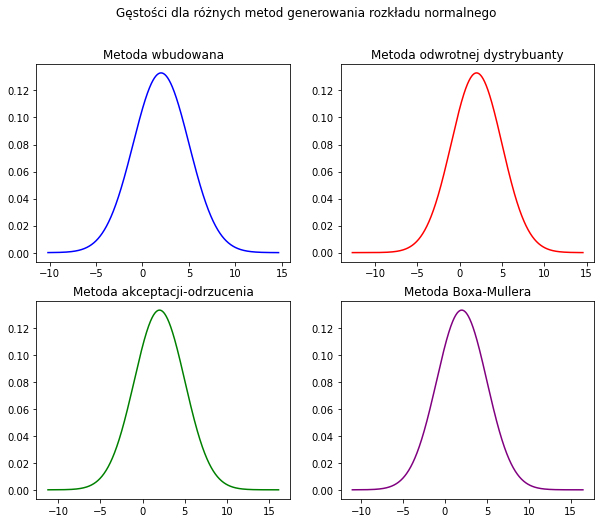

In [19]:

pdf_wbud = norm.pdf(x_wbud, loc=mu, scale=sigma) #wbudowana funkcja do gęstości
pdf_odwr = norm.pdf(x_odwr, loc=mu, scale=sigma)
pdf_akcept = norm.pdf(x_akcept, loc=mu, scale=sigma)
pdf_box = norm.pdf(x_box, loc=mu, scale=sigma)
#RYSOWANIE WYKRESÓW
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Gęstości dla różnych metod generowania rozkładu normalnego')
axs[0, 0].plot(x_wbud, pdf_wbud, color='blue')
axs[0, 0].set_title('Metoda wbudowana')
axs[0, 1].plot(x_odwr, pdf_odwr, color='red')
axs[0, 1].set_title('Metoda odwrotnej dystrybuanty')
axs[1, 0].plot(x_akcept, pdf_akcept, color='green')
axs[1, 0].set_title('Metoda akceptacji-odrzucenia')
axs[1, 1].plot(x_box, pdf_box, color='purple')
axs[1, 1].set_title('Metoda Boxa-Mullera')
plt.show()

## Testy statystyczne
### Test Shapiro-Wilka

In [20]:
print('WYNIKI TESTU STATYSTYCZNEGO SHAPIRO-WILKA:')
stat, p = shapiro(norm_wbud)
print('dla metody wbudowanej:', 'statystyka testu=%.3f, prawdopodobieństwo=%.3f' % (stat, p))
stat, p = shapiro(norm_odwr)
print('dla metody odwrotnej dystrybuanty:', 'statystyka testu=%.3f, prawdopodobieństwo=%.3f' % (stat, p))
stat, p = shapiro(norm_akcept)
print('dla metody akceptacji-odrzucenia:', 'statystyka testu=%.3f, prawdopodobieństwo=%.3f' % (stat, p))
stat, p = shapiro(norm_box)
print('dla metody Boxa-Mullera:', 'statystyka testu=%.3f, prawdopodobieństwo=%.3f' % (stat, p))

WYNIKI TESTU STATYSTYCZNEGO SHAPIRO-WILKA:
dla metody wbudowanej: statystyka testu=1.000, prawdopodobieństwo=0.718
dla metody odwrotnej dystrybuanty: statystyka testu=1.000, prawdopodobieństwo=0.888
dla metody akceptacji-odrzucenia: statystyka testu=1.000, prawdopodobieństwo=0.258
dla metody Boxa-Mullera: statystyka testu=1.000, prawdopodobieństwo=1.000


c:\Users\Marcelina\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### Interpretacja
Prawdopodobieństwo (p-value) jest wartością między 0 a 1, która informuje o stopniu pewności, z jakim możemy stwierdzić, że próbka pochodzi z rozkładu normalnego

### Test Kołmogorowa-Smirnowa

In [21]:
# Generowanie prób dla wbudowanego rozkładu normalnego
builtin_samples = np.random.normal(mu, sigma, n)
# Wykonanie testu Kołmogorowa-Smirnowa
print('WYNIKI TESTU STATYSTYCZNEGO KOŁMOGOROWA-SMIRNOWA:')
ks_statistic, p_value = ks_2samp(norm_wbud, builtin_samples)
print('dla metody wbudowanej:', 'statystyka testu=',ks_statistic, 'prawdopodobieństwo=', p_value)
ks_statistic, p_value = ks_2samp(norm_odwr, builtin_samples)
print('dla metody odwrotnej dystrybuanty:', 'statystyka testu=',ks_statistic, 'prawdopodobieństwo=', p_value)
ks_statistic, p_value = ks_2samp(norm_akcept, builtin_samples)
print('dla metody akceptacji-odrzucenia:', 'statystyka testu=',ks_statistic, 'prawdopodobieństwo=', p_value)
ks_statistic, p_value = ks_2samp(norm_box, builtin_samples)
print('dla metody Boxa-Mullera:', 'statystyka testu=',ks_statistic, 'prawdopodobieństwo=', p_value)

WYNIKI TESTU STATYSTYCZNEGO KOŁMOGOROWA-SMIRNOWA:
dla metody wbudowanej: statystyka testu= 0.0021700000000000053 prawdopodobieństwo= 0.9722166095957416
dla metody odwrotnej dystrybuanty: statystyka testu= 0.003280000000000005 prawdopodobieństwo= 0.6538462508075868
dla metody akceptacji-odrzucenia: statystyka testu= 0.003720000000000001 prawdopodobieństwo= 0.49218433123490113
dla metody Boxa-Mullera: statystyka testu= 0.003290000000000015 prawdopodobieństwo= 0.6500743641763744


#### Interpretacja
Prawdopodobieństwo (p-value) jest wartością między 0 a 1, która informuje o stopniu pewności, z jakim możemy stwierdzić, że próbka pochodzi z rozkładu normalnego

### Test Andersona-Darlinga

In [22]:
print('WYNIKI TESTU STATYSTYCZNEGO ANDERSONA-DARLINGA:')
result = anderson(norm_wbud, dist='norm')
print('dla metody wbudowanej:')
print("Statystyka testu:", result.statistic)
print("Wartości krytyczne dla tego testu:", result.critical_values)
print("Poziomy istotności dla tego testu:", result.significance_level)
result = anderson(norm_odwr, dist='norm')
print('dla metody odwrotnej dystrybuanty:')
print("Statystyka testu:", result.statistic)
print("Wartości krytyczne dla tego testu:", result.critical_values)
print("Poziomy istotności dla tego testu:", result.significance_level)
result = anderson(norm_akcept, dist='norm')
print('dla metody akceptacji-odrzucenia:')
print("Statystyka testu:", result.statistic)
print("Wartości krytyczne dla tego testu:", result.critical_values)
print("Poziomy istotności dla tego testu:", result.significance_level)
result = anderson(norm_box, dist='norm')
print('dla metody Boxa-Mullera:')
print("Statystyka testu:", result.statistic)
print("Wartości krytyczne dla tego testu:", result.critical_values)
print("Poziomy istotności dla tego testu:", result.significance_level)

WYNIKI TESTU STATYSTYCZNEGO ANDERSONA-DARLINGA:
dla metody wbudowanej:
Statystyka testu: 0.15648903245164547
Wartości krytyczne dla tego testu: [0.576 0.656 0.787 0.918 1.092]
Poziomy istotności dla tego testu: [15.  10.   5.   2.5  1. ]
dla metody odwrotnej dystrybuanty:
Statystyka testu: 0.3668415459105745
Wartości krytyczne dla tego testu: [0.576 0.656 0.787 0.918 1.092]
Poziomy istotności dla tego testu: [15.  10.   5.   2.5  1. ]
dla metody akceptacji-odrzucenia:
Statystyka testu: 0.9462260885047726
Wartości krytyczne dla tego testu: [0.576 0.656 0.787 0.918 1.092]
Poziomy istotności dla tego testu: [15.  10.   5.   2.5  1. ]
dla metody Boxa-Mullera:
Statystyka testu: 0.35399641131516546
Wartości krytyczne dla tego testu: [0.576 0.656 0.787 0.918 1.092]
Poziomy istotności dla tego testu: [15.  10.   5.   2.5  1. ]


#### Interpretacja
Test Andersona-Darlinga sprawdza, czy próbka ma określony rozkład. Jeśli statystyka testowa jest wyższa niż wartość krytyczna, hipoteza zerowa jest odrzucana na odpowiednim poziomie istotności.

## Czasy generowania rozkładów

In [23]:
print('CZAS GENEROWANIA ROZKŁADU NORMALNEGO:')
print("za pomocą funkcji wbudowanej:", wbud_czas)
print("za pomocą metody odwrotnej dystrybuanty:", odwrotna_dystrybuanta_czas)
print("za pomocą metody akceptacji-odrzucenia:", akceptacja_odrzucenie_czas)
print("za pomocą metody Boxa-Mullera:", box_muller_czas)

CZAS GENEROWANIA ROZKŁADU NORMALNEGO:
za pomocą funkcji wbudowanej: 0.005203099999789629
za pomocą metody odwrotnej dystrybuanty: 0.00563760000000002
za pomocą metody akceptacji-odrzucenia: 3.813501300000098
za pomocą metody Boxa-Mullera: 2.5351192000000538


## Użycie pamięci dla rozkładów

In [24]:
print('UŻYCIE PAMIĘCI DLA GENEROWANIA ROZKŁADU NORMALNEGO:')
print("za pomocą funkcji wbudowanej:", wbud_uzycie_pamieci)
print("za pomocą metody odwrotnej dystrybuanty:", odwrotna_dystrybuanta_uzycie_pamieci)
print("za pomocą metody akceptacji-odrzucenia:", akceptacja_odrzucenie_uzycie_pamieci)
print("za pomocą metody Boxa-Mullera:", box_muller_uzycie_pamieci)

UŻYCIE PAMIĘCI DLA GENEROWANIA ROZKŁADU NORMALNEGO:
za pomocą funkcji wbudowanej: [220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625, 220.75390625]
za pomocą metody odwrotnej dystrybuanty: [220.74609375, 220.74609375, 220.8359375, 220.91015625, 220.97265625, 221.03125, 221.08984375, 221.14453125, 221.2890625, 221.34765625, 221.40625, 221.46484375, 2

## 6. Zadanie 5 <a name="6"></a>

In [25]:

# generowanie zmiennych X i Y z rozkładu normalnego
mean = [0, 0] #średnie
amount=10000 #liczba prób
#zależność dodatnia słaba
cov_dod_slaba = [[1, 0.01], [0.01, 1]]
prob_dod_slaba = np.random.multivariate_normal(mean, cov_dod_slaba, size=amount)
X_dod_slaba = prob_dod_slaba[:, 0] # podział na dwie zależne zmienne losowe
Y_dod_slaba = prob_dod_slaba[:, 1]
#zależność dodatnia silna
cov_dod_silna = [[1, 0.99], [0.99, 1]]
prob_dod_silna = np.random.multivariate_normal(mean, cov_dod_silna, size=amount)
X_dod_silna = prob_dod_silna[:, 0] # podział na dwie zależne zmienne losowe
Y_dod_silna = prob_dod_silna[:, 1]
#zależność ujemna słaba
cov_uj_slaba = [[1, -0.01], [-0.01, 1]]
prob_uj_slaba = np.random.multivariate_normal(mean, cov_uj_slaba, size=amount)
X_uj_slaba = prob_uj_slaba[:, 0] # podział na dwie zależne zmienne losowe
Y_uj_slaba = prob_uj_slaba[:, 1]
#zależność ujemna silna
cov_uj_silna = [[1, -0.99], [-0.99, 1]]
prob_uj_silna = np.random.multivariate_normal(mean, cov_uj_silna, size=amount)
X_uj_silna = prob_uj_silna[:, 0] # podział na dwie zależne zmienne losowe
Y_uj_silna = prob_uj_silna[:, 1]


### ZDEFINIOWANIE ZMIENNYCH SUMY, RÓŻNICY ORAZ SUMY KWADRATÓW DLA X i Y

In [26]:
# X+Y
A_dod_slaba = X_dod_slaba + Y_dod_slaba
A_dod_silna = X_dod_silna + Y_dod_silna
A_uj_slaba = X_uj_slaba + Y_uj_slaba
A_uj_silna = X_uj_silna + Y_uj_silna
# X-Y
B_dod_slaba = X_dod_slaba - Y_dod_slaba
B_dod_silna = X_dod_silna - Y_dod_silna
B_uj_slaba = X_uj_slaba - Y_uj_slaba
B_uj_silna = X_uj_silna - Y_uj_silna
# X^2+Y^2
C_dod_slaba = X_dod_slaba**2 + Y_dod_slaba**2
C_dod_silna = X_dod_silna**2 + Y_dod_silna**2
C_uj_slaba = X_uj_slaba**2 + Y_uj_slaba**2
C_uj_silna = X_uj_silna**2 + Y_uj_silna**2


### GENEROWANIE WYKRESÓW
#### Histogramy zmiennej losowej X

Text(0.5, 1.0, 'Zależność ujemna silna')

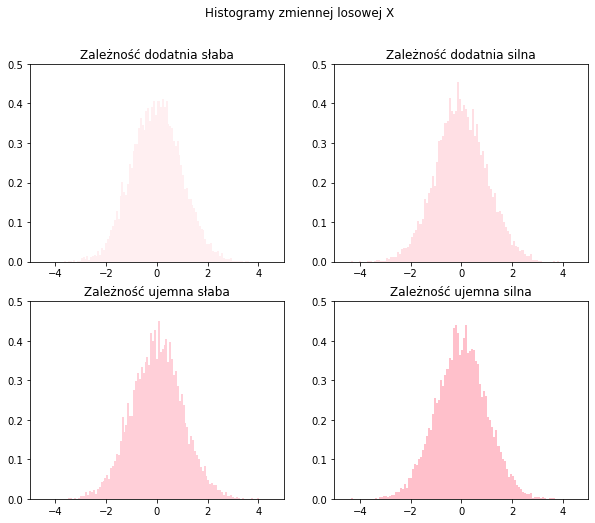

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Histogramy zmiennej losowej X')
axs[0, 0].hist(X_dod_slaba,color='pink', alpha=0.25, density=True, bins='sqrt')
axs[0, 0].set_xlim(-5,5,1)
axs[0, 0].set_ylim(0,0.5)
axs[0, 0].set_title('Zależność dodatnia słaba')
axs[0, 1].hist(X_dod_silna,color='pink', alpha=0.5, density=True, bins='sqrt')
axs[0, 1].set_xlim(-5,5,1)
axs[0, 1].set_ylim(0,0.5)
axs[0, 1].set_title('Zależność dodatnia silna')
axs[1, 0].hist(X_uj_slaba, color='pink', alpha=0.75, density=True, bins='sqrt')
axs[1, 0].set_xlim(-5,5,1)
axs[1, 0].set_ylim(0,0.5)
axs[1, 0].set_title('Zależność ujemna słaba')
axs[1, 1].hist(X_uj_silna, color='pink', alpha=1, density=True, bins='sqrt')
axs[1, 1].set_xlim(-5,5,1)
axs[1, 1].set_ylim(0,0.5)
axs[1, 1].set_title('Zależność ujemna silna')

#### Histogramy zmiennej losowej Y

Text(0.5, 1.0, 'Zależność ujemna silna')

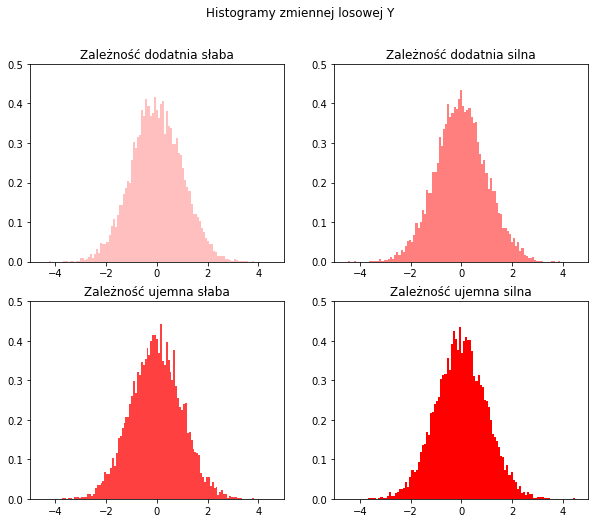

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Histogramy zmiennej losowej Y')
axs[0, 0].hist(Y_dod_slaba,color='red', alpha=0.25, density=True, bins='sqrt')
axs[0, 0].set_xlim(-5,5,1)
axs[0, 0].set_ylim(0,0.5)
axs[0, 0].set_title('Zależność dodatnia słaba')
axs[0, 1].hist(Y_dod_silna,color='red', alpha=0.5, density=True, bins='sqrt')
axs[0, 1].set_xlim(-5,5,1)
axs[0, 1].set_ylim(0,0.5)
axs[0, 1].set_title('Zależność dodatnia silna')
axs[1, 0].hist(Y_uj_slaba, color='red', alpha=0.75, density=True, bins='sqrt')
axs[1, 0].set_xlim(-5,5,1)
axs[1, 0].set_ylim(0,0.5)
axs[1, 0].set_title('Zależność ujemna słaba')
axs[1, 1].hist(Y_uj_silna, color='red', alpha=1, density=True, bins='sqrt')
axs[1, 1].set_xlim(-5,5,1)
axs[1, 1].set_ylim(0,0.5)
axs[1, 1].set_title('Zależność ujemna silna')

Jak widzimy na powyższych wykresach, zależność między zmiennymi nie wpływa na ich rozkłady.

#### Wykresy zależności zmiennych X i Y

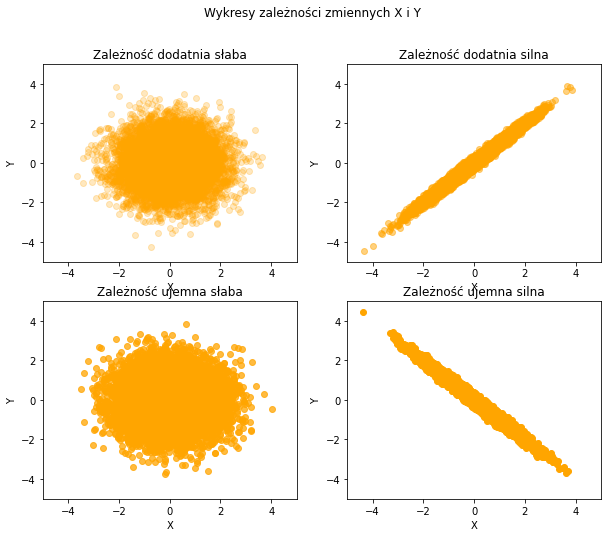

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Wykresy zależności zmiennych X i Y')
axs[0, 0].scatter(X_dod_slaba, Y_dod_slaba,color='orange', alpha=0.25)
axs[0, 0].set_xlim(-5,5,1)
axs[0, 0].set_ylim(-5,5,1)
axs[0, 0].set_xlabel('X')
axs[0, 0].set_ylabel('Y')
axs[0, 0].set_title('Zależność dodatnia słaba')
axs[0, 1].scatter(X_dod_silna, Y_dod_silna,color='orange', alpha=0.5)
axs[0, 1].set_xlim(-5,5,1)
axs[0, 1].set_ylim(-5,5,1)
axs[0, 1].set_xlabel('X')
axs[0, 1].set_ylabel('Y')
axs[0, 1].set_title('Zależność dodatnia silna')
axs[1, 0].scatter(X_uj_slaba, Y_uj_slaba, color='orange', alpha=0.75)
axs[1, 0].set_xlim(-5,5,1)
axs[1, 0].set_ylim(-5,5,1)
axs[1, 0].set_xlabel('X')
axs[1, 0].set_ylabel('Y')
axs[1, 0].set_title('Zależność ujemna słaba')
axs[1, 1].scatter(X_uj_silna, Y_uj_silna, color='orange', alpha=1)
axs[1, 1].set_xlim(-5,5,1)
axs[1, 1].set_ylim(-5,5,1)
axs[1, 1].set_xlabel('X')
axs[1, 1].set_ylabel('Y')
axs[1, 1].set_title('Zależność ujemna silna')
plt.show()


Jak widzimy na powyższych wykresach, im większa zależność zmiennych, tym bardziej wykresy zależności zmiennych od siebie "zbliżają się do siebie". Im słabsza zależność, tym bardziej rozpraszają się one. Dodatnia zależność mówi o tym, że wraz ze wzrostem jednej zmiennej, rośnie druga zmienna, a ujemna zależność oznacza, że wraz ze wzrostem jednej zmiennej, druga maleje. Dokładnie widac to na powyższych wykresach.

#### Histogramy rozkładu A=X+Y

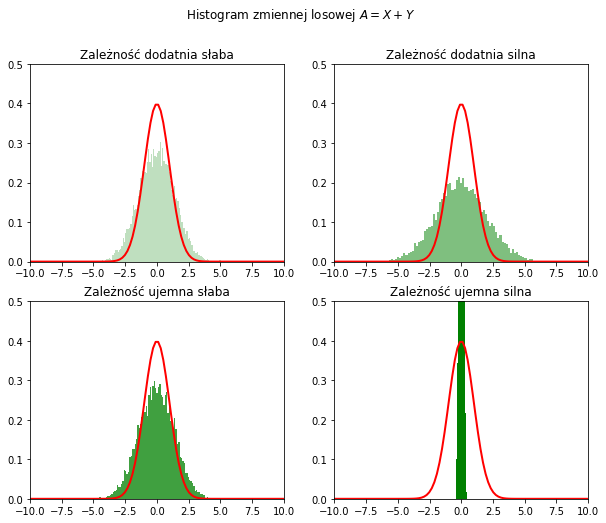

In [30]:
x = np.linspace(-10, 10, 100)#zakres osi x
y = norm.pdf(x, 0, 1)#gęstość rozkładu normalnego
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Histogram zmiennej losowej $A=X+Y$')
axs[0, 0].hist(A_dod_slaba,color='green', alpha=0.25, density=True, bins='sqrt')
axs[0, 0].set_xlim(-10,10,1)
axs[0, 0].set_ylim(0,0.5)
axs[0, 0].plot(x, y, color='red', linewidth=2)
axs[0, 0].set_title('Zależność dodatnia słaba')
axs[0, 1].hist(A_dod_silna,color='green', alpha=0.5, density=True, bins='sqrt')
axs[0, 1].plot(x, y, color='red', linewidth=2)
axs[0, 1].set_xlim(-10,10,1)
axs[0, 1].set_ylim(0,0.5)
axs[0, 1].set_title('Zależność dodatnia silna')
axs[1, 0].hist(A_uj_slaba, color='green', alpha=0.75, density=True, bins='sqrt')
axs[1, 0].plot(x, y, color='red', linewidth=2)
axs[1, 0].set_xlim(-10,10,1)
axs[1, 0].set_ylim(0,0.5)
axs[1, 0].set_title('Zależność ujemna słaba')
axs[1, 1].hist(A_uj_silna, color='green', alpha=1, density=True, bins='sqrt')
axs[1, 1].plot(x, y, color='red', linewidth=2)
axs[1, 1].set_xlim(-10,10,1)
axs[1, 1].set_ylim(0,0.5)
axs[1, 1].set_title('Zależność ujemna silna')
plt.show()

##### Interpretacja
- Histogramy dla zależności słabych, zarówno dodatnich jak i ujemnych, nie różnią się bardzo od wykresów rozkładu normalnego.
- W zależnościach silnych różnice są dużo bardziej zauważalne:
* silna dodatnia zależność, sprawia, że wykres jest mniej spiczasty, niż rozkład normalny(większa wariancja),
* silna ujemna zależność sprawia, że wykres jest bardziej spiczasty, niż rozkład normalny(mniejsza wariancja).
Dla X+Y ujemna korelacja zmniejsza wariancję. Sprawia, że wartości są skupione wokół zera, natomiast dodatnia korelacja sprawia, że wartości są bardziej rozbieżne.
#### Histogramy rozkładu B=X-Y

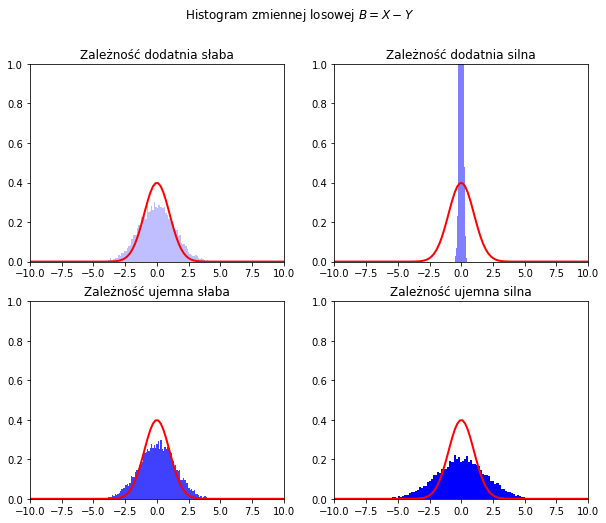

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Histogram zmiennej losowej $B=X-Y$')
axs[0, 0].hist(B_dod_slaba,color='blue', alpha=0.25, density=True, bins='sqrt')
axs[0, 0].plot(x, y, color='red', linewidth=2)
axs[0, 0].set_xlim(-10,10,1)
axs[0, 0].set_ylim(0,1)
axs[0, 0].set_title('Zależność dodatnia słaba')
axs[0, 1].hist(B_dod_silna,color='blue', alpha=0.5, density=True, bins='sqrt')
axs[0, 1].plot(x, y, color='red', linewidth=2)
axs[0, 1].set_xlim(-10,10,1)
axs[0, 1].set_ylim(0,1)
axs[0, 1].set_title('Zależność dodatnia silna')
axs[1, 0].hist(B_uj_slaba, color='blue', alpha=0.75, density=True, bins='sqrt')
axs[1, 0].plot(x, y, color='red', linewidth=2)
axs[1, 0].set_xlim(-10,10,1)
axs[1, 0].set_ylim(0,1)
axs[1, 0].set_title('Zależność ujemna słaba')
axs[1, 1].hist(B_uj_silna, color='blue', alpha=1, density=True, bins='sqrt')
axs[1, 1].plot(x, y, color='red', linewidth=2)
axs[1, 1].set_xlim(-10,10,1)
axs[1, 1].set_ylim(0,1)
axs[1, 1].set_title('Zależność ujemna silna')
plt.show()

##### Interpretacja
- Histogramy dla zależności słabych, zarówno dodatnich jak i ujemnych, nie różnią się bardzo od wykresów rozkładu normalnego.
- W zależnościach silnych różnice są dużo bardziej zauważalne:
* silna dodatnia zależność, sprawia, że wykres jest bardziej spiczasty, niż rozkład normalny(mniejsza wariancja),
* silna ujemna zależność sprawia, że wykres jest mniej spiczasty, niż rozkład normalny(większa wariancja).
Dla X-Y dodatnia korelacja zmniejsza wariancję, sprawia, że wartości są skupione wokół zera, natomiast ujemna korelacja sprawia, że wartości są bardziej rozbieżne.
W takim razie dla różnych X i Y obserwujemy odwrotne zjawisko, niż w przypadku sumy X i Y, tak, jak oczekiwaliśmy.
#### Histogramy rozkładu C=X^2+Y^2

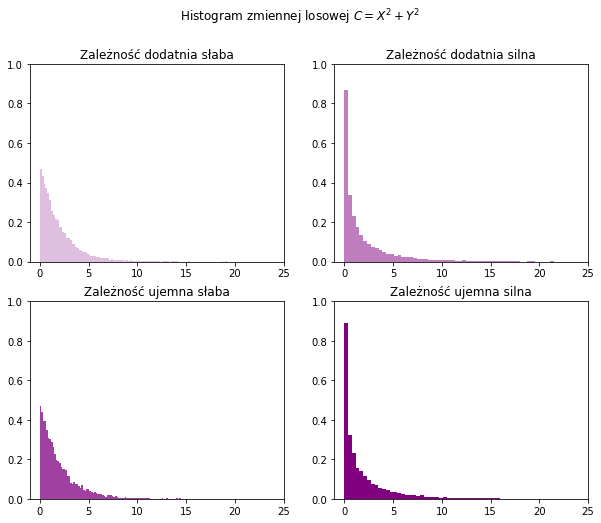

In [32]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Histogram zmiennej losowej $C=X^2+Y^2$')
axs[0, 0].hist(C_dod_slaba,color='purple', alpha=0.25, density=True, bins='sqrt')
axs[0, 0].set_xlim(-1,25,1)
axs[0, 0].set_ylim(0,1)
axs[0, 0].set_title('Zależność dodatnia słaba')
axs[0, 1].hist(C_dod_silna,color='purple', alpha=0.5, density=True, bins='sqrt')
axs[0, 1].set_xlim(-1,25,1)
axs[0, 1].set_ylim(0,1)
axs[0, 1].set_title('Zależność dodatnia silna')
axs[1, 0].hist(C_uj_slaba, color='purple', alpha=0.75, density=True, bins='sqrt')
axs[1, 0].set_xlim(-1,25,1)
axs[1, 0].set_ylim(0,1)
axs[1, 0].set_title('Zależność ujemna słaba')
axs[1, 1].hist(C_uj_silna, color='purple', alpha=1, density=True, bins='sqrt')
axs[1, 1].set_xlim(-1,25,1)
axs[1, 1].set_ylim(0,1)
axs[1, 1].set_title('Zależność ujemna silna')
plt.show()

Zależność nie ma bezpośredniego wpływu na rozkład sumy kwadratów $X^2 + Y^2$. Niezależnie od charakteru zależności między X i Y, rozkład sumy kwadratów będzie miał podobny wykres, ze względu na kwadratowe operacje na zmiennych X i Y.  Jedynie dla 0 histogram osiąga dużo większą wartość dla zależności silnych, niż dla tych słabych. 
#### Obliczenie statystyk opisowych dla zmiennych X + Y, X - Y i X^2 + Y^2 w różnych scenariuszach zależności.
Będziemy obliczać następujące charakterystyki:
- Średnia (mean): Jest to średnia arytmetyczna wartości zmiennych. Oblicza się sumę wszystkich wartości i dzieli przez liczbę obserwacji. Wyższa średnia oznacza większą wartość oczekiwaną, a mniejsza - mniejszą.
- Mediana (median):Dzieli uporządkowany ciąg danych na dwie róne części. Jest to wartość środkowa w przypadku nieparzystej liczby obserwacji lub średnia arytmetyczna dwóch środkowych wartości w przypadku parzystej liczby obserwacji. 
- Wariancja (variance): Jest to miara rozproszenia danych wokół ich średniej. Oblicza się średnią z kwadratów różnic między wartościami obserwacji a średnią arytmetyczną. Wyższa wariancja oznacza większe rozproszenie danych, mniejsza - mniejsze.
- Skośność (skewness): Jest to miara asymetrii rozkładu danych, która określa, czy dane są skupione bardziej po lewej czy po prawej stronie średniej. Dodatnia wartość skośności oznacza, że ogon rozkładu jest dłuższy po prawej stronie - więcej wartości odstających w prawo, a skośność ujemna oznacza, że ogon rozkładu jest dłuższy po lewej stronie - więcej wartości odstających w lewo. Skośność równa zero oznacza symetryczny rozkład.
- Kurtoza (kurtosis): Jest to miara "ogonów" rozkładu. Określa, czy rozkład danych ma bardziej zaokrąglony, czy bardziej szpiczasty kształt. Wyższa kurtoza - bardziej zaokrąglony kształt, podczas gdy niższa kurtoza - bardziej szpiczasty kształt.

In [33]:
# Dla A=X+Y
mean_A_dod_slaba = np.mean(A_dod_slaba)
mean_A_dod_silna = np.mean(A_dod_silna)
mean_A_uj_slaba = np.mean(A_uj_slaba)
mean_A_uj_silna = np.mean(A_uj_silna)

median_A_dod_slaba = np.median(A_dod_slaba)
median_A_dod_silna = np.median(A_dod_silna)
median_A_uj_slaba = np.median(A_uj_slaba)
median_A_uj_silna = np.median(A_uj_silna)

var_A_dod_slaba = np.var(A_dod_slaba)
var_A_dod_silna = np.var(A_dod_silna)
var_A_uj_slaba = np.var(A_uj_slaba)
var_A_uj_silna = np.var(A_uj_silna)

skewness_A_dod_slaba = skew(A_dod_slaba)
skewness_A_dod_silna = skew(A_dod_silna)
skewness_A_uj_slaba = skew(A_uj_slaba)
skewness_A_uj_silna = skew(A_uj_silna)

kurtosis_A_dod_slaba = kurtosis(A_dod_slaba)
kurtosis_A_dod_silna = kurtosis(A_dod_silna)
kurtosis_A_uj_slaba = kurtosis(A_uj_slaba)
kurtosis_A_uj_silna = kurtosis(A_uj_silna)

print("Statystyki opisowe dla zmiennych A = X + Y:")
print('---------------------------------------------------')
print("Zależność dodatnia słaba:")
print("Średnia: ", mean_A_dod_slaba)
print("Mediana: ", median_A_dod_slaba)
print("Wariancja: ", var_A_dod_slaba)
print("Skośność: ", skewness_A_dod_slaba)
print("Kurtoza: ", kurtosis_A_dod_slaba)
print('---------------------------------------------------')
print("Zależność dodatnia silna:")
print("Średnia: ", mean_A_dod_silna)
print("Mediana: ", median_A_dod_silna)
print("Wariancja: ", var_A_dod_silna)
print("Skośność: ", skewness_A_dod_silna)
print("Kurtoza: ", kurtosis_A_dod_silna)
print('---------------------------------------------------')
print("Zależność ujemna słaba:")
print("Średnia: ", mean_A_uj_slaba)
print("Mediana: ", median_A_uj_slaba)
print("Wariancja: ", var_A_uj_slaba)
print("Skośność: ", skewness_A_uj_slaba)
print("Kurtoza: ", kurtosis_A_uj_slaba)
print('---------------------------------------------------')
print("Zależność ujemna silna:")
print("Średnia: ", mean_A_uj_silna)
print("Mediana: ", median_A_uj_silna)
print("Wariancja: ", var_A_uj_silna)
print("Skośność: ", skewness_A_uj_silna)
print("Kurtoza: ", kurtosis_A_uj_silna)

Statystyki opisowe dla zmiennych A = X + Y:
---------------------------------------------------
Zależność dodatnia słaba:
Średnia:  -0.020662077339237982
Mediana:  -0.018382187023044005
Wariancja:  1.9846573690418547
Skośność:  0.005986220929429574
Kurtoza:  -0.09679362790090673
---------------------------------------------------
Zależność dodatnia silna:
Średnia:  -0.013896191012416341
Mediana:  -0.04415043399358576
Wariancja:  4.009898469087131
Skośność:  0.007399127474743293
Kurtoza:  0.074175138286245
---------------------------------------------------
Zależność ujemna słaba:
Średnia:  -0.026271678404735065
Mediana:  -0.02298039666190707
Wariancja:  1.9643833209438166
Skośność:  -0.005897768111637553
Kurtoza:  -0.05840688910715386
---------------------------------------------------
Zależność ujemna silna:
Średnia:  -0.0003568711594019164
Mediana:  -0.0015840369396177278
Wariancja:  0.020117163941462252
Skośność:  -0.005906993706443751
Kurtoza:  -0.02974615308273787


In [34]:
# Dla B=X-Y
mean_B_dod_slaba = np.mean(B_dod_slaba)
mean_B_dod_silna = np.mean(B_dod_silna)
mean_B_uj_slaba = np.mean(B_uj_slaba)
mean_B_uj_silna = np.mean(B_uj_silna)

median_B_dod_slaba = np.median(B_dod_slaba)
median_B_dod_silna = np.median(B_dod_silna)
median_B_uj_slaba = np.median(B_uj_slaba)
median_B_uj_silna = np.median(B_uj_silna)

var_B_dod_slaba = np.var(B_dod_slaba)
var_B_dod_silna = np.var(B_dod_silna)
var_B_uj_slaba = np.var(B_uj_slaba)
var_B_uj_silna = np.var(B_uj_silna)

skewness_B_dod_slaba = skew(B_dod_slaba)
skewness_B_dod_silna = skew(B_dod_silna)
skewness_B_uj_slaba = skew(B_uj_slaba)
skewness_B_uj_silna = skew(B_uj_silna)

kurtosis_B_dod_slaba = kurtosis(B_dod_slaba)
kurtosis_B_dod_silna = kurtosis(B_dod_silna)
kurtosis_B_uj_slaba = kurtosis(B_uj_slaba)
kurtosis_B_uj_silna = kurtosis(B_uj_silna)


print("Statystyki opisowe dla zmiennych B = X - Y:")
print('---------------------------------------------------')
print("Zależność dodatnia słaba:")
print("Średnia: ", mean_B_dod_slaba)
print("Mediana: ", median_B_dod_slaba)
print("Wariancja: ", var_B_dod_slaba)
print("Skośność: ", skewness_B_dod_slaba)
print("Kurtoza: ", kurtosis_B_dod_slaba)
print('---------------------------------------------------')
print("Zależność dodatnia silna:")
print("Średnia: ", mean_B_dod_silna)
print("Mediana: ", median_B_dod_silna)
print("Wariancja: ", var_B_dod_silna)
print("Skośność: ", skewness_B_dod_silna)
print("Kurtoza: ", kurtosis_B_dod_silna)
print('---------------------------------------------------')
print("Zależność ujemna słaba:")
print("Średnia: ", mean_B_uj_slaba)
print("Mediana: ", median_B_uj_slaba)
print("Wariancja: ", var_B_uj_slaba)
print("Skośność: ", skewness_B_uj_slaba)
print("Kurtoza: ", kurtosis_B_uj_slaba)
print('---------------------------------------------------')
print("Zależność ujemna silna:")
print("Średnia: ", mean_B_uj_silna)
print("Mediana: ", median_B_uj_silna)
print("Wariancja: ", var_B_uj_silna)
print("Skośność: ", skewness_B_uj_silna)
print("Kurtoza: ", kurtosis_B_uj_silna)

Statystyki opisowe dla zmiennych B = X - Y:
---------------------------------------------------
Zależność dodatnia słaba:
Średnia:  -0.0032010738110182842
Mediana:  -0.015073152343252738
Wariancja:  1.9367516097649045
Skośność:  0.05242338505926918
Kurtoza:  0.05855557855224136
---------------------------------------------------
Zależność dodatnia silna:
Średnia:  -0.0006188186319719854
Mediana:  6.369791334615016e-06
Wariancja:  0.019920897365348533
Skośność:  -0.019472099125943013
Kurtoza:  -0.112475623603566
---------------------------------------------------
Zależność ujemna słaba:
Średnia:  0.03696442084117215
Mediana:  0.0482760153839418
Wariancja:  2.031729077413393
Skośność:  -0.029378368614403426
Kurtoza:  0.006672392871600152
---------------------------------------------------
Zależność ujemna silna:
Średnia:  0.01004773341815598
Mediana:  0.01243446945387627
Wariancja:  3.9520949578152664
Skośność:  -0.004677711418661109
Kurtoza:  0.045326194499584194


In [35]:
# Dla C=X^2+Y^2
mean_C_dod_slaba = np.mean(C_dod_slaba)
mean_C_dod_silna = np.mean(C_dod_silna)
mean_C_uj_slaba = np.mean(C_uj_slaba)
mean_C_uj_silna = np.mean(C_uj_silna)

median_C_dod_slaba = np.median(C_dod_slaba)
median_C_dod_silna = np.median(C_dod_silna)
median_C_uj_slaba = np.median(C_uj_slaba)
median_C_uj_silna = np.median(C_uj_silna)

var_C_dod_slaba = np.var(C_dod_slaba)
var_C_dod_silna = np.var(C_dod_silna)
var_C_uj_slaba = np.var(C_uj_slaba)
var_C_uj_silna = np.var(C_uj_silna)

skewness_C_dod_slaba = skew(C_dod_slaba)
skewness_C_dod_silna = skew(C_dod_silna)
skewness_C_uj_slaba = skew(C_uj_slaba)
skewness_C_uj_silna = skew(C_uj_silna)

kurtosis_C_dod_slaba = kurtosis(C_dod_slaba)
kurtosis_C_dod_silna = kurtosis(C_dod_silna)
kurtosis_C_uj_slaba = kurtosis(C_uj_slaba)
kurtosis_C_uj_silna = kurtosis(C_uj_silna)


print("Statystyki opisowe dla zmiennych C = X^2 + Y^2:")
print('---------------------------------------------------')
print("Zależność dodatnia słaba:")
print("Średnia: ", mean_C_dod_slaba)
print("Mediana: ", median_C_dod_slaba)
print("Wariancja: ", var_C_dod_slaba)
print("Skośność: ", skewness_C_dod_slaba)
print("Kurtoza: ", kurtosis_C_dod_slaba)
print('---------------------------------------------------')
print("Zależność dodatnia silna:")
print("Średnia: ", mean_C_dod_silna)
print("Mediana: ", median_C_dod_silna)
print("Wariancja: ", var_C_dod_silna)
print("Skośność: ", skewness_C_dod_silna)
print("Kurtoza: ", kurtosis_C_dod_silna)
print('---------------------------------------------------')
print("Zależność ujemna słaba:")
print("Średnia: ", mean_C_uj_slaba)
print("Mediana: ", median_C_uj_slaba)
print("Wariancja: ", var_C_uj_slaba)
print("Skośność: ", skewness_C_uj_slaba)
print("Kurtoza: ", kurtosis_C_uj_slaba)
print('---------------------------------------------------')
print("Zależność ujemna silna:")
print("Średnia: ", mean_C_uj_silna)
print("Mediana: ", median_C_uj_silna)
print("Wariancja: ", var_C_uj_silna)
print("Skośność: ", skewness_C_uj_silna)
print("Kurtoza: ", kurtosis_C_uj_silna)

Statystyki opisowe dla zmiennych C = X^2 + Y^2:
---------------------------------------------------
Zależność dodatnia słaba:
Średnia:  1.9609230735601377
Mediana:  1.3648704250864898
Wariancja:  3.8215252521136804
Skośność:  2.0102954879284454
Kurtoza:  5.910486920446637
---------------------------------------------------
Zależność dodatnia silna:
Średnia:  2.0150064267568157
Mediana:  0.8893694802174177
Wariancja:  8.338825106911843
Skośność:  2.965350749226469
Kurtoza:  14.21649864574622
---------------------------------------------------
Zależność ujemna słaba:
Średnia:  1.999084483925767
Mediana:  1.3768940175533433
Wariancja:  3.9556750603376085
Skośność:  1.9524816058482628
Kurtoza:  5.374908456307313
---------------------------------------------------
Zależność ujemna silna:
Średnia:  1.9861566030302977
Mediana:  0.8882602122829123
Wariancja:  7.986315174674365
Skośność:  2.897830977016677
Kurtoza:  13.015385724893243
